In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
db = pd.read_csv("train.csv")
db_test = pd.read_csv("test.csv")

# 1. Data exploration

In [3]:
db.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
db.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
db.shape

(1460, 81)

(from kaggle kernel) We can see there are some outliers and do not make too much sense, since
normally the price would increase as the area increase. Then we drop these two observations.

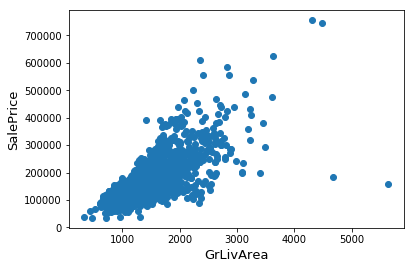

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = db['GrLivArea'], y = db['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

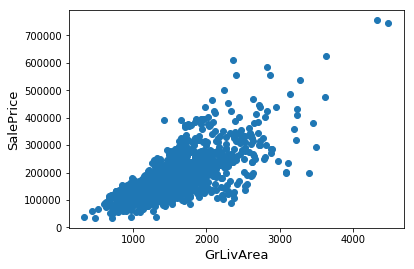

In [7]:
db = db.drop(db[(db['GrLivArea']>4000) & (db['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(db['GrLivArea'], db['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# 2. Data cleaning

Let's check the missing values

In [8]:
db.isnull().sum()
db_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

From above we can see that there are some columns have many missing vlaues. In order to not make the missing value miss lead our prediction, I am going to drop all the columns that have over 400 missing values. 

In [9]:
db = db.drop(['Alley', 'FireplaceQu', "PoolQC", 'Fence','MiscFeature'], axis=1)

In [10]:
test = db_test.drop(['Alley', 'FireplaceQu', "PoolQC", 'Fence','MiscFeature'], axis=1)

Since the Year, Quality, Condition, Class variables do not have much numeric meaning, we turn these variables into catogocial variabes.(We compared the result if we keep these variables as numberic variable, and we found this method would make some improvements in the result)

In [11]:
db["YearRemodAdd"] =db["YearRemodAdd"].astype('category')
db["OverallQual"]= db["OverallQual"].astype('category')
db["GarageYrBlt"] =db["GarageYrBlt"].astype('category')
db["YearBuilt"] =db["YearBuilt"].astype('category')
db["YrSold"] =db["YrSold"].astype('category')
db["MoSold"] =db["MoSold"].astype('category')
db["OverallCond"] =db["OverallCond"].astype('category')
db["MSSubClass"] =db["MSSubClass"].astype('category')

In [12]:
test["YearRemodAdd"] =test["YearRemodAdd"].astype('category')
test["OverallQual"]= test["OverallQual"].astype('category')
test["GarageYrBlt"] =test["GarageYrBlt"].astype('category')
test["YearBuilt"] =test["YearBuilt"].astype('category')
test["YrSold"] =test["YrSold"].astype('category')
test["MoSold"] =test["MoSold"].astype('category')
test["OverallCond"] =test["OverallCond"].astype('category')
test["MSSubClass"] =test["MSSubClass"].astype('category')

Before we impute the missing values, we do the partition to avoid leakage.

In [13]:
from sklearn.cross_validation import train_test_split
train, valid = train_test_split(db, test_size=0.2, random_state=123)

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


now check the missing value again.

In [14]:
train.isnull().sum()
valid.isnull().sum()
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
                ... 
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual   

Since we need to add some noise to the numeric variables, we have to check the variable type first.

In [15]:
db.dtypes

Id                  int64
MSSubClass       category
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual      category
OverallCond      category
YearBuilt        category
YearRemodAdd     category
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
BsmtQual           object
                   ...   
BsmtFullBath        int64
BsmtHalfBath        int64
FullBath            int64
HalfBath            int64
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual        object
TotRmsAbvGrd

For the missing values, we assign them with new values according to the frequency of those non missing values, which make the values have simlar distribution after we impute the missing values. For those variables with large numeric values, we add more noise to them than those with small numeric values. 

In [16]:
#for categorical variables
for column in ["MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional",
              "SaleType","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","Electrical",
               "BsmtFinType1","GarageYrBlt","GarageType","GarageFinish","GarageQual","GarageCond"]:
    train[column]=train[column].fillna(np.random.choice(train[column].dropna()))
    valid[column]=valid[column].fillna(np.random.choice(valid[column].dropna()))
    test[column]=test[column].fillna(np.random.choice(test[column].dropna()))
    
#for large numeric variables
for column in ["GarageArea","TotalBsmtSF",
               "BsmtFinSF1","LotFrontage","BsmtFinSF2","BsmtUnfSF",
               "MasVnrArea"]:
    train[column]=train[column].fillna(np.random.choice(train[column].dropna()+np.random.normal(0,5)))
    valid[column]=valid[column].fillna(np.random.choice(valid[column].dropna()+np.random.normal(0,5)))
    test[column]=test[column].fillna(np.random.choice(test[column].dropna()+np.random.normal(0,5)))

    
#for small numeric variables  
for column in ["GarageCars","BsmtFullBath","BsmtHalfBath"]:
    train[column]=train[column].fillna(np.random.choice(train[column].dropna()+np.random.normal(0,1)))
    valid[column]=valid[column].fillna(np.random.choice(valid[column].dropna()+np.random.normal(0,1)))
    test[column]=test[column].fillna(np.random.choice(test[column].dropna()+np.random.normal(0,1)))

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [17]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [18]:
null_columns=valid.columns[valid.isnull().any()]
valid[null_columns].isnull().sum()

Series([], dtype: float64)

In [19]:
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

Series([], dtype: float64)

now we have already impute all missing values

# 3. Feature engineering

At first, we try using target encoding to those categorical variable, but the result was not satisfying. We can skip this step because when we use H2O to fit the model, it would do taget encoding automatically.

When we explore the data earlier, we find there is many variables related to area and room, then we add new colums from these variables. And we find this step help improve the prediction.

In [20]:
train["TotalLivingArea"] = train["TotalBsmtSF"]+train["1stFlrSF"]+train["2ndFlrSF"]+train["GrLivArea"]+train["GarageArea"]+train["WoodDeckSF"]+train["OpenPorchSF"]+train["EnclosedPorch"]+train["ScreenPorch"]
valid["TotalLivingArea"] = valid["TotalBsmtSF"]+valid["1stFlrSF"]+valid["2ndFlrSF"]+valid["GrLivArea"]+valid["GarageArea"]+valid["WoodDeckSF"]+valid["OpenPorchSF"]+valid["EnclosedPorch"]+valid["ScreenPorch"]
test["TotalLivingArea"] = test["TotalBsmtSF"]+test["1stFlrSF"]+test["2ndFlrSF"]+test["GrLivArea"]+test["GarageArea"]+test["WoodDeckSF"]+test["OpenPorchSF"]+test["EnclosedPorch"]+test["ScreenPorch"]

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
train["TotalBathRoom"]= train["FullBath"]+ 0.5*train["HalfBath"]+train["BsmtFullBath"]
valid["TotalBathRoom"]= valid["FullBath"]+ 0.5*valid["HalfBath"]+valid["BsmtFullBath"]
test["TotalBathRoom"]= test["FullBath"]+ 0.5*test["HalfBath"]+test["BsmtFullBath"]

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Then we check the correlation of the variables, we would like to drop those variables with low correlations to the target vairbles. Before that, we move the target variable to the last column for convenience.

In [22]:
train["saleprice"]=train["SalePrice"]
valid["saleprice"]=valid["SalePrice"]

del train["SalePrice"]
del valid["SalePrice"]

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
train.corr().shape

(32, 32)

In [24]:
train.corr().loc[:,'saleprice']

Id                -0.003859
LotFrontage        0.357566
LotArea            0.279026
MasVnrArea         0.489915
BsmtFinSF1         0.429185
BsmtFinSF2        -0.000001
BsmtUnfSF          0.192743
TotalBsmtSF        0.657661
1stFlrSF           0.628156
2ndFlrSF           0.313961
LowQualFinSF      -0.048254
GrLivArea          0.729442
BsmtFullBath       0.246471
BsmtHalfBath      -0.013596
FullBath           0.558325
HalfBath           0.282365
BedroomAbvGr       0.155140
KitchenAbvGr      -0.136950
TotRmsAbvGrd       0.526401
Fireplaces         0.452571
GarageCars         0.631910
GarageArea         0.630899
WoodDeckSF         0.319319
OpenPorchSF        0.309806
EnclosedPorch     -0.120682
3SsnPorch          0.041779
ScreenPorch        0.082858
PoolArea           0.107587
MiscVal           -0.009430
TotalLivingArea    0.839652
TotalBathRoom      0.631946
saleprice          1.000000
Name: saleprice, dtype: float64

In [25]:
ycor=train.corr().iloc[31:32,:32]
ycor


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalLivingArea,TotalBathRoom,saleprice
saleprice,-0.003859,0.357566,0.279026,0.489915,0.429185,-0.000001,0.192743,0.657661,0.628156,0.313961,...,0.319319,0.309806,-0.120682,0.041779,0.082858,0.107587,-0.00943,0.839652,0.631946,1.0


In [26]:
# we find using 0.4 as threshold would achive better result than 0.2,0.3,0.45 and 0.5
to_drop = [column for column in ycor.columns if any(abs(ycor[column] )<0.4)]
to_drop

['Id',
 'LotFrontage',
 'LotArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [27]:
for i in to_drop:
    del train[i]
    del valid[i]
    del test[i]

In [28]:
train.corr().shape

(13, 13)

Also we found multicollinearity among some variables, but no matter we use principle component or simply use feature selection, the methods did not make a better result when we removed those highly correlated variables.

Then we looked at the scale of all numeric variables. To avoid some varibles dominate the model, we standardize numeric variables. In this part, we attempted using winsorizing and binning, but none of the methods helped with the accuracy of the prediction.

In [29]:
train.describe()

,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,TotalLivingArea,TotalBathRoom,saleprice
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,102.821116,450.463122,1061.599485,1168.314751,1507.042882,1.568611,6.508576,0.599485,1.762436,470.102058,4716.921955,2.184820,181504.937393
std,173.603150,441.781697,419.075088,376.069411,507.512040,0.544982,1.612562,0.635137,0.741877,208.635713,1437.661242,0.796409,80444.008030
min,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,668.000000,1.000000,34900.000000
25%,0.000000,0.000000,804.000000,888.000000,1132.500000,1.000000,5.000000,0.000000,1.000000,336.000000,3730.500000,2.000000,129600.000000
50%,0.000000,389.000000,1008.000000,1098.000000,1456.000000,2.000000,6.000000,1.000000,2.000000,478.000000,4556.500000,2.000000,163950.000000
75%,166.000000,733.000000,1310.750000,1409.500000,1768.000000,2.000000,7.000000,1.000000,2.000000,576.000000,5539.000000,2.500000,214000.000000
max,1378.000000,2188.000000,3200.000000,3228.000000,4476.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,12410.000000,6.000000,755000.000000


In [30]:
numeric = train.corr().columns
numeric

Index(['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'TotalLivingArea', 'TotalBathRoom', 'saleprice'],
      dtype='object')

In [31]:
for col_name in list(set(numeric)-set(["saleprice"])):
    new_col_name = col_name + '_std'
    train[col_name] = np.log1p(train[col_name])# seems it would improve the result a little bit
    train[new_col_name] =(train[col_name] - train[col_name].mean())/train[col_name].std()

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
train = train.drop(list(set(numeric)-set(["saleprice"])), axis =1)

In [33]:
for col_name in list(set(numeric)-set(["saleprice"])):
    test[col_name] = np.log1p(test[col_name])
    new_col_name = col_name + '_std'
    test[new_col_name] = (test[col_name] - test[col_name].mean())/test[col_name].std()

In [34]:
test = test.drop(list(set(numeric)-set(["saleprice"])), axis =1)

In [35]:
for col_name in list(set(numeric)-set(["saleprice"])):
    valid[col_name] = np.log1p(valid[col_name])
    new_col_name = col_name + '_std'
    valid[new_col_name] = (valid[col_name] - valid[col_name].mean())/valid[col_name].std()

/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zengweihao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [36]:
valid= valid.drop(list(set(numeric)-set(["saleprice"])), axis=1)

Also, the dependent variable is right skewed, so we are going to transfer it to make it more normally distributed

In [37]:
train["saleprice"] = np.log1p(train["saleprice"])

In [38]:
valid["saleprice"] = np.log1p(valid["saleprice"])

# 4. Fit the model

we use three method here, the first one would be the gbm model.(In most of our trial, this is the better model than the random forest, penalized linear regression and neural network.)

In [39]:
y = 'saleprice'
X = [name for name in train.columns if name not in ['Id',y]]

In [40]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [41]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/m7/1trmx2qs6vggd9ygt9nd4dpr0000gn/T/tmp3zhvb6aq
  JVM stdout: /var/folders/m7/1trmx2qs6vggd9ygt9nd4dpr0000gn/T/tmp3zhvb6aq/h2o_zengweihao_started_from_python.out
  JVM stderr: /var/folders/m7/1trmx2qs6vggd9ygt9nd4dpr0000gn/T/tmp3zhvb6aq/h2o_zengweihao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,1 month and 16 days
H2O cluster name:,H2O_from_python_zengweihao_qxurmr
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [42]:
trainhf = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
validationhf = h2o.H2OFrame(valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
testhf = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [45]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
hyper_parameters = {'ntrees':list(range(0, 600, 100)),
                    'max_depth':list(range(0, 30, 3)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':30,
                   'max_runtime_secs':3000}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)
gsearch.train(x=X,
              y=y,
              training_frame=trainhf,
              validation_frame=validationhf)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: col_sample_rate, 0.9
Hyper-parameter: max_depth, 0
Hyper-parameter: ntrees, 400
Hyper-parameter: sample_rate, 0.7
failure_details: Illegal argument(s) for GBM model: Grid_GBM_Key_Frame__upload_8041e88d9dae1d575d56acd5f3a74fdb.hex_model_python_1524171635404_1_model_0.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: Grid_GBM_Key_Frame__upload_8041e88d9dae1d575d56acd5f3a74fdb.hex_model_python_1524171635404_1_model_0.  Details: ERRR on field: _max_depth: _max_depth must be > 0.

	at water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
	at hex.tree.gbm.GBM.init(GBM.java:84)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:202)
	at hex.ModelBuilder$

In [46]:

# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.1         9    400         0.8   
1                0.5         3    100         0.8   
2                0.5         6    100         0.4   
3                0.2         6    200         1.0   
4                0.4        12    300         0.5   
5                0.9        15    100         0.5   
6                0.5         6    100         0.6   
7                0.2        24    100         0.2   
8                0.4         3    100         0.4   
9                0.8         6    400         0.5   
10               0.8        24    200         0.7   
11               0.1         9    100         0.5   
12               0.5        18    400         0.3   
13               0.7        18    200         0.3   
14               0.4        24    100         0.4   
15               0.5        27    200         0.6   
16               0.2         3    100         0.5   
17               0.1         9    300         

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-04-19 17:00:53,12.859 sec,0.0,0.3998853,0.3107750,0.1599082,0.3983800,0.3081362,0.1587066
,2018-04-19 17:00:53,12.872 sec,1.0,0.3682001,0.2843771,0.1355713,0.3657131,0.2811664,0.1337461
,2018-04-19 17:00:53,12.878 sec,2.0,0.3387769,0.2600805,0.1147698,0.3363661,0.2559384,0.1131421
,2018-04-19 17:00:53,12.884 sec,3.0,0.3121815,0.2381453,0.0974573,0.3122970,0.2347771,0.0975294
,2018-04-19 17:00:53,12.888 sec,4.0,0.2904894,0.2196568,0.0843841,0.2914361,0.2169930,0.0849350
---,---,---,---,---,---,---,---,---,---
,2018-04-19 17:00:55,15.286 sec,396.0,0.0095308,0.0061450,0.0000908,0.1181708,0.0837107,0.0139643
,2018-04-19 17:00:55,15.298 sec,397.0,0.0095080,0.0061360,0.0000904,0.1181821,0.0837204,0.0139670
,2018-04-19 17:00:55,15.306 sec,398.0,0.0094692,0.0061029,0.0000897,0.1181744,0.0837272,0.0139652
,2018-04-19 17:00:55,15.312 sec,399.0,0.0094231,0.0060709,0.0000888,0.1181992,0.0837398,0.0139711



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual,120.5311508,1.0,0.1352856
TotalBsmtSF_std,98.3122940,0.8156588,0.1103469
KitchenQual,95.8842468,0.7955142,0.1076216
TotalLivingArea_std,74.7175293,0.6199022,0.0838639
YearBuilt,58.2577286,0.4833417,0.0653892
---,---,---,---
Heating,0.1096768,0.0009099,0.0001231
RoofMatl,0.0404684,0.0003358,0.0000454
Street,0.0,0.0,0.0
Utilities,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [47]:
final = gbm_model.predict(testhf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [PosA]
  warnings.warn(w)


In [48]:
h2o.download_csv(final, "kaggle1.csv")

The second model we use is neural network

In [49]:
import h2o 
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [50]:
%matplotlib inline

In [51]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,44 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,1 month and 16 days
H2O cluster name:,H2O_from_python_zengweihao_qxurmr
H2O cluster total nodes:,1
H2O cluster free memory:,1.750 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [52]:
train_nn = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [53]:
test_nn = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [54]:
validation_nn = h2o.H2OFrame(valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
y = 'saleprice'
X = [name for name in train_nn.columns if name not in ['Id', y]]
print(y)
print(X)

saleprice
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', '1stFlrSF_std', 'TotalLivingArea_std', 'TotalBsmtSF_std', 'FullBath_std', 'MasVnrArea_std', 'TotalBathRoom_std', 'Fireplaces_std', 'GarageCars_std', 'TotRmsAbvGrd_std', 'GarageArea_std', 'GrLivArea_std', 'BsmtFinSF1_std']


In [56]:
# initialize nn model
nn_model = H2ODeepLearningEstimator(
    epochs=70,                    # read over the data 70 times, but in mini-batches
    hidden=[300],                 # 300 hidden units in 1 hidden layer
    input_dropout_ratio=0.2,      # randomly drop 20% of inputs for each iteration, helps w/ generalization
    hidden_dropout_ratios=[0.05], # randomly set 5% of hidden weights to 0 each iteration, helps w/ generalization
    activation='TanhWithDropout', # bounded activation function that allows for dropout, tanh
    l1=0.001,                     # L1 penalty can help generalization   
    l2=0.01,                      # L2 penalty can increase stability in presence of highly correlated inputs
    adaptive_rate=True,           # adjust magnitude of weight updates automatically (+stability, +accuracy)
    stopping_rounds=5,            # stop after validation error does not decrease for 5 iterations
    score_each_iteration=True,    # score validation error on every iteration
    model_id='nn_model')          # for easy lookup in flow

# train nn model
nn_model.train(
    x=X,
    y=y,
    training_frame=train_nn,
    validation_frame=validation_nn)

# print model information
nn_model


deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  nn_model


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.01322061028730909
RMSE: 0.11498091270862781
MAE: 0.08373475571527901
RMSLE: 0.008922573317339519
Mean Residual Deviance: 0.01322061028730909

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.015580815603038796
RMSE: 0.12482313729048311
MAE: 0.09323041370255084
RMSLE: 0.009757344817907207
Mean Residual Deviance: 0.015580815603038796
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,validation_rmse,validation_deviance,validation_mae
,2018-04-19 17:01:21,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2018-04-19 17:01:23,3.193 sec,2875 obs/sec,7.0,1,8162.0,0.1413447,0.0199783,0.1101069,0.1499049,0.0224715,0.1187270
,2018-04-19 17:01:25,5.107 sec,3561 obs/sec,14.0,2,16324.0,0.1338521,0.0179164,0.1052289,0.1460190,0.0213215,0.1161677
,2018-04-19 17:01:27,6.969 sec,3853 obs/sec,21.0,3,24486.0,0.1149809,0.0132206,0.0837348,0.1248231,0.0155808,0.0932304
,2018-04-19 17:01:29,8.504 sec,4173 obs/sec,28.0,4,32648.0,0.1202613,0.0144628,0.0913360,0.1351839,0.0182747,0.1030899
,2018-04-19 17:01:30,9.957 sec,4432 obs/sec,35.0,5,40810.0,0.1288740,0.0166085,0.0995942,0.1429090,0.0204230,0.1116032
,2018-04-19 17:01:32,11.459 sec,4608 obs/sec,42.0,6,48972.0,0.1143386,0.0130733,0.0852371,0.1318321,0.0173797,0.0996656
,2018-04-19 17:01:34,13.496 sec,4542 obs/sec,49.0,7,57134.0,0.1205159,0.0145241,0.0930524,0.1414520,0.0200087,0.1086381
,2018-04-19 17:01:35,15.003 sec,4661 obs/sec,56.0,8,65296.0,0.1209566,0.0146305,0.0908622,0.1384115,0.0191577,0.1048653
,2018-04-19 17:01:37,16.597 sec,4764 obs/sec,63.0,9,73458.0,0.1294385,0.0167543,0.0992594,0.1463349,0.0214139,0.1111310


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
MSZoning.C (all),1.0,1.0,0.0100685
Functional.Maj1,0.8462706,0.8462706,0.0085207
Neighborhood.NoRidge,0.8084036,0.8084036,0.0081394
Functional.Maj2,0.7157471,0.7157471,0.0072065
Neighborhood.Crawfor,0.7123141,0.7123141,0.0071720
---,---,---,---
LandSlope.missing(NA),0.0,0.0,0.0
GarageFinish.missing(NA),0.0,0.0,0.0
Utilities.missing(NA),0.0,0.0,0.0
CentralAir.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [57]:
nn_model =nn_model.predict(test_nn)

deeplearning prediction progress: |███████████████████████████████████████| 100%


/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [PosA]
  warnings.warn(w)


In [58]:
h2o.download_csv(nn_model, "kaggle2.csv")

The third one is random forest

In [59]:
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [60]:
%matplotlib inline

In [61]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 min 04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,1 month and 16 days
H2O cluster name:,H2O_from_python_zengweihao_qxurmr
H2O cluster total nodes:,1
H2O cluster free memory:,1.724 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [62]:
train_random = h2o.H2OFrame(train)
validation_random = h2o.H2OFrame(valid)
test_random = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
y = 'saleprice'
X = [name for name in train_nn.columns if name not in ['Id', y]]
print(y)
print(X)

saleprice
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', '1stFlrSF_std', 'TotalLivingArea_std', 'TotalBsmtSF_std', 'FullBath_std', 'MasVnrArea_std', 'TotalBathRoom_std', 'Fireplaces_std', 'GarageCars_std', 'TotRmsAbvGrd_std', 'GarageArea_std', 'GrLivArea_std', 'BsmtFinSF1_std']


In [64]:
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow

# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train_random,
    validation_frame=validation_random)

# print model information
rf_model

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.019573429245811402
RMSE: 0.13990507226620272
MAE: 0.09633462286642508
RMSLE: 0.010899156214239238
Mean Residual Deviance: 0.019573429245811402

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.01741496098172008
RMSE: 0.13196575685275358
MAE: 0.09145760536193841
RMSLE: 0.010321394237331279
Mean Residual Deviance: 0.01741496098172008
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-04-19 17:01:41,0.028 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-04-19 17:01:41,0.143 sec,1.0,0.2069565,0.1521022,0.0428310,0.1986816,0.1452181,0.0394744
,2018-04-19 17:01:41,0.208 sec,2.0,0.1985571,0.1444538,0.0394249,0.1756303,0.1268877,0.0308460
,2018-04-19 17:01:41,0.267 sec,3.0,0.1882407,0.1384280,0.0354346,0.1693602,0.1199520,0.0286829
,2018-04-19 17:01:41,0.313 sec,4.0,0.1876913,0.1328026,0.0352280,0.1589497,0.1127837,0.0252650
---,---,---,---,---,---,---,---,---,---
,2018-04-19 17:01:42,0.957 sec,23.0,0.1405011,0.0981570,0.0197405,0.1318757,0.0915139,0.0173912
,2018-04-19 17:01:42,0.996 sec,24.0,0.1400781,0.0976282,0.0196219,0.1321573,0.0913327,0.0174656
,2018-04-19 17:01:42,1.044 sec,25.0,0.1398077,0.0968961,0.0195462,0.1323872,0.0915479,0.0175264
,2018-04-19 17:01:42,1.130 sec,26.0,0.1399588,0.0966684,0.0195885,0.1326397,0.0913390,0.0175933



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual,1367.0374756,1.0,0.3436294
TotalLivingArea_std,585.1434326,0.4280376,0.1470863
Neighborhood,410.9991455,0.3006495,0.1033120
ExterQual,311.1703186,0.2276238,0.0782182
YearBuilt,174.7467499,0.1278288,0.0439257
---,---,---,---
RoofMatl,0.2456875,0.0001797,0.0000618
Condition2,0.0452775,0.0000331,0.0000114
Heating,0.0359282,0.0000263,0.0000090
Street,0.0056046,0.0000041,0.0000014



See the whole table with table.as_data_frame()


In [65]:
predict_random=rf_model.predict(test_random)

drf prediction progress: |████████████████████████████████████████████████| 100%


/Users/zengweihao/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [PosA]
  warnings.warn(w)


In [66]:
h2o.download_csv(predict_random, "kaggle3.csv")

In [67]:
h2o.cluster().shutdown(prompt=False)


H2O session _sid_93e5 closed.


In [68]:
pred1 = pd.read_csv("kaggle1.csv")
pred2 = pd.read_csv("kaggle2.csv")
pred3 = pd.read_csv("kaggle3.csv")

pred1 = np.expm1(pred1)   # we took the log of saleprice before we fit the model
pred2 = np.expm1(pred2)
pred3 = np.expm1(pred3)

# 5. Model Aggregation:
Below we are going to take the average of all the models' prediction to get our final values of the housing price. Doing this improved our predicting comparing with using a single model's prediction for the housing price.

In [69]:
final = pd.concat([pred1,pred2,pred3],axis=1)

In [70]:
final["SalePrice"]= final.mean(axis=1)

In [71]:
final1 = final.drop("predict",axis =1 )

In [72]:
final1.shape

(1459, 1)

In [73]:
final1.to_csv("kaggle_sumit.csv")

These files with prediction need manipulation using Excel, so that we can upload to Kaggle.
I scored 0.12455 and rank #1121.

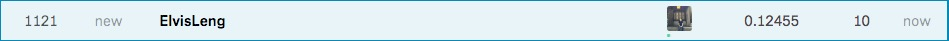